## 데이터프레임 합치기

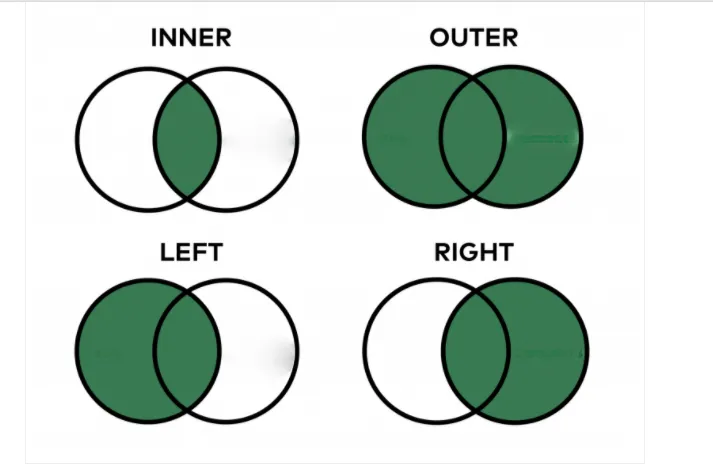

### pd.merge()
공통 컬럼을 기준으로 합치는 기능

In [15]:
import pandas as pd

In [16]:
fruit = pd.DataFrame({'Num':[123, 456, 789, 1011, 1112], 'Fruit':['Apple', 'Banana', 'Cherry', 'Lemon', 'Peach']})
grade = pd.DataFrame({'Num':[123, 789, 1314], 'Grade':['A', 'B', 'C']})

print(fruit, '\n')
print(grade)

    Num   Fruit
0   123   Apple
1   456  Banana
2   789  Cherry
3  1011   Lemon
4  1112   Peach 

    Num Grade
0   123     A
1   789     B
2  1314     C


#### Left Join

In [17]:
# 컬럼 명이 다르다면 통일시키는 것을 추천 
pd.merge(fruit, grade, on='Num', how='left')

,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN


In [18]:
# right join 대신 데이터 프레임 위치를 바꿔 left join
pd.merge(grade, fruit, on='Num', how='left')

,Num,Grade,Fruit
0,123,A,Apple
1,789,B,Cherry
2,1314,C,NaN


### Inner Join

In [19]:
pd.merge(fruit, grade, on='Num', how='inner')

,Num,Fruit,Grade
0,123,Apple,A
1,789,Cherry,B


### Outer Join

In [20]:
pd.merge(fruit, grade, on='Num', how='outer')

,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN
5,1314,NaN,C


## pd.concat()
물리적으로 인덱스 또는 컬럼을 이어 붙여주는 함수    
강제로 병합할 때 용이하다.

In [21]:
import pandas as pd

In [22]:
df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                    'b':['b0','b1','b2','b3'],
                    'c':['c0','c1','c2','c3']},
                    index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                    'b':['b2','b3','b4','b5'],
                    'c':['c2','c3','c4','c5'],
                    'd':['d2','d3','d4','d5']},
                    index = [2,3,4,5])

print(df1, '\n')
print(df2)

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

    a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5


### 행 방향으로 합치기

In [23]:
# axis를 0으로 지정하여 행 방향으로 합친다. 
result1 = pd.concat([df1,  df2], axis=0)
result1

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


#### 인덱스 재정의

In [27]:
result_2 = pd.concat([df1, df2], axis=0)
result_2.reset_index(inplace=True)
result_2

,index,a,b,c,d
0,0,a0,b0,c0,NaN
1,1,a1,b1,c1,NaN
2,2,a2,b2,c2,NaN
3,3,a3,b3,c3,NaN
4,2,a2,b2,c2,d2
5,3,a3,b3,c3,d3
6,4,a4,b4,c4,d4
7,5,a5,b5,c5,d5


In [28]:
# concat을 이용한 inner join은 추천하지 않는 방법, merge를 사용하는 것이 더 낫다. 
result3 = pd.concat([df1,df2], ignore_index=True, join='inner')
result3

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3
4,a2,b2,c2
5,a3,b3,c3
6,a4,b4,c4
7,a5,b5,c5


### 열 방향으로 합치기

In [29]:
result4 = pd.concat([df1, df2], axis=1)
result4

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


In [30]:
# concat을 이용한 inner join (비추)
result5 = pd.concat([df1,df2], axis=1, join='inner')
result5

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


#### 인덱스 재정의

In [31]:
result5.reset_index(inplace=True)
result5

,index,a,b,c,a,b,c,d
0,2,a2,b2,c2,a2,b2,c2,d2
1,3,a3,b3,c3,a3,b3,c3,d3


### 시리즈와 합치기

In [32]:
sr1 = pd.Series(['e8', 'e1', 'e2', 'e3'], name='e')
sr1

0    e8
1    e1
2    e2
3    e3
Name: e, dtype: object

In [33]:
# 열 방향으로 합치기 
result6 = pd.concat([df1, sr1], axis=1)
result6

,a,b,c,e
0,a0,b0,c0,e8
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3
